In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import requests
import os
import skimage
from skimage import io
import hashlib
from matplotlib.pyplot import imshow
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg
from matplotlib import rcParams

### Calculate Euclidean Distance and update the centroid with Mean of each cluster

In [2]:
# Using euclidean distance 
def assign_cluster_labels(X, centers): #Learn partly from CSE 6040
    S = np.zeros((len(X), len(centers)))   
    for i in range(len(X)):
        S[i,:] = np.linalg.norm(X[i,:]-centers, ord=2, axis=1)**2
    return np.argmin(S, axis=1) 

In [3]:
def update_centers(X, y): #Learn partly from CSE 6040
    d = 3  #dimension in this question is always 3
    assert len(X) == len(y)
    assert (min(y) >= 0)
    centers = np.empty(((max(y) + 1), d))
    for j in range(max(y) + 1):
        m = (y == j)
        if any(m):
            centers[j, :d] = np.mean(X[m, :], axis=0)
    return centers

### Calculate KMeans

In [4]:
def kmeans(X, k, previous_centers=None, maxiter=np.inf):  #Learn partly from CSE 6040
    if previous_centers is None:
        centers = X[np.random.choice(len(X), k, replace = True),:]
    else:
        centers = previous_centers
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= maxiter):
        old_centers = centers
        labels = assign_cluster_labels(X, centers)
        centers = update_centers(X, labels)
        converged = (set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers]))
        i += 1
    count = i
    print ("number of iteration is " +  str(count))
    return labels

DISPLAY THE IMAGES


In [5]:
def result(file, k):
    myimg = io.imread(file)
    myimg = myimg / 255 #Scale it
    
    print("Shape of the matrix from image:" + str(myimg.shape))
 
    import time
    tic = time.time()
    rows = myimg.shape[0]
    cols = myimg.shape[1]
    print('rows x cols = ',rows,'X',cols)
    r, c, l = myimg.shape
    img_reshaped = np.reshape(myimg, (r*c, l), order="C")
    labels = kmeans(img_reshaped, k)
    ind = np.column_stack((img_reshaped, labels))
    centroids = {}
    for i in set(labels):
        c = ind[ind[:,3] == i].mean(axis=0)
        centroids[i] = c[:3]
    centroids
    print('shape of the centroids', len(centroids))
    print('shape of class', np.shape(labels))
    img_new = np.array([centroids[i] for i in labels])
    print('shape of new compressed image', np.shape(img_new))
    img_disp = np.reshape(img_new, (myimg.shape[0], myimg.shape[1], myimg.shape[2]), order="C")
    
    # figure size in inches optional
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(myimg)
    ax[1].imshow(img_disp)
    
    toc = time.time()
    print ('Elapsed time is %f seconds \n' % float(toc - tic)) 

Shape of the matrix obtained by reading the image:(412, 620, 3)
rows x cols =  412 X 620
number of iteration is 23
shape of the centroids 2
shape of class (255440,)
shape of new image (255440, 3)
Elapsed time is 38.664538 seconds 



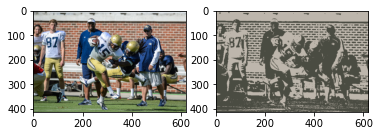

In [6]:
# With k = 2:
K2 = result(file = 'football.bmp',k =2)

Shape of the matrix obtained by reading the image:(412, 620, 3)
rows x cols =  412 X 620
number of iteration is 35
shape of the centroids 4
shape of class (255440,)
shape of new image (255440, 3)
Elapsed time is 62.157248 seconds 



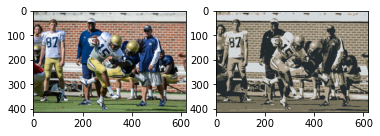

In [7]:
# With k = 4:
K4 = result(file = 'football.bmp',k =4)

Shape of the matrix obtained by reading the image:(412, 620, 3)
rows x cols =  412 X 620
number of iteration is 59
shape of the centroids 8
shape of class (255440,)
shape of new image (255440, 3)
Elapsed time is 106.353750 seconds 



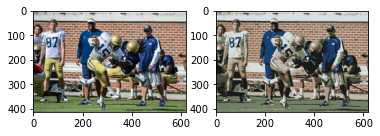

In [8]:
# With k = 8:
K8 = result(file = 'football.bmp',k =8)

Shape of the matrix obtained by reading the image:(412, 620, 3)
rows x cols =  412 X 620
number of iteration is 70
shape of the centroids 16
shape of class (255440,)
shape of new image (255440, 3)
Elapsed time is 152.063359 seconds 



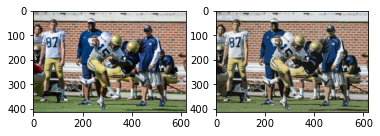

In [16]:
K16 = result(file = 'football.bmp',k =16)

Shape of the matrix obtained by reading the image:(224, 298, 3)
rows x cols =  224 X 298
number of iteration is 87
shape of the centroids 8
shape of class (66752,)
shape of new image (66752, 3)
Elapsed time is 38.657972 seconds 



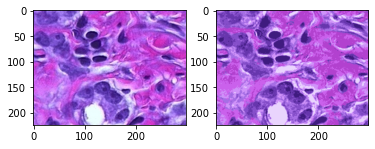

In [9]:
K8_hes = result(file = 'hestain.bmp',k =8)

Shape of the matrix obtained by reading the image:(224, 298, 3)
rows x cols =  224 X 298
number of iteration is 66
shape of the centroids 4
shape of class (66752,)
shape of new image (66752, 3)
Elapsed time is 30.518095 seconds 



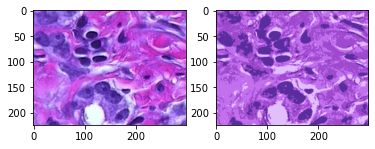

In [10]:
K4_hes = result(file = 'hestain.bmp',k =4)

Shape of the matrix obtained by reading the image:(224, 298, 3)
rows x cols =  224 X 298
number of iteration is 21
shape of the centroids 2
shape of class (66752,)
shape of new image (66752, 3)
Elapsed time is 9.047942 seconds 



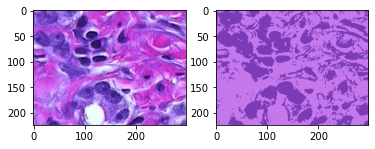

In [11]:
K2_hes = result(file = 'hestain.bmp',k =2)

Shape of the matrix obtained by reading the image:(224, 298, 3)
rows x cols =  224 X 298
number of iteration is 139
shape of the centroids 16
shape of class (66752,)
shape of new image (66752, 3)
Elapsed time is 74.972882 seconds 



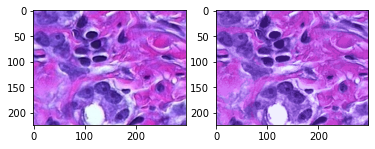

In [15]:
K16_hes = result(file = 'hestain.bmp',k =16)

Shape of the matrix obtained by reading the image:(320, 240, 3)
rows x cols =  320 X 240
number of iteration is 15
shape of the centroids 2
shape of class (76800,)
shape of new image (76800, 3)
Elapsed time is 7.610936 seconds 



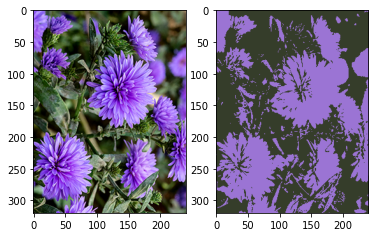

In [12]:
K2_fl = result(file = 'flowers.bmp',k =2)

Shape of the matrix obtained by reading the image:(320, 240, 3)
rows x cols =  320 X 240
number of iteration is 33
shape of the centroids 4
shape of class (76800,)
shape of new image (76800, 3)
Elapsed time is 16.818860 seconds 



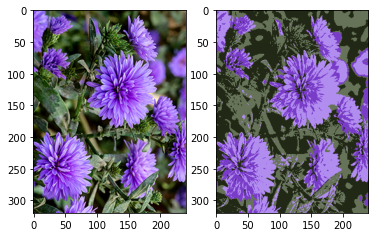

In [13]:
K4_fl = result(file = 'flowers.bmp',k =4)

Shape of the matrix obtained by reading the image:(320, 240, 3)
rows x cols =  320 X 240
number of iteration is 64
shape of the centroids 8
shape of class (76800,)
shape of new image (76800, 3)
Elapsed time is 34.638548 seconds 



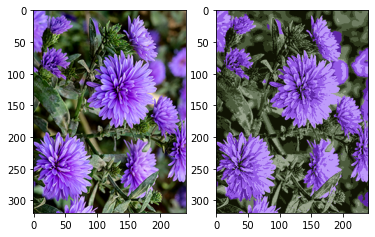

In [14]:
K8_fl = result(file = 'flowers.bmp',k =8)

Shape of the matrix obtained by reading the image:(320, 240, 3)
rows x cols =  320 X 240
number of iteration is 254
shape of the centroids 16
shape of class (76800,)
shape of new image (76800, 3)
Elapsed time is 167.275893 seconds 



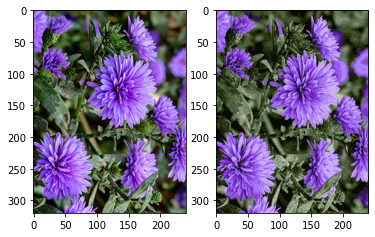

In [17]:
K6_fl = result(file = 'flowers.bmp',k =16)